# Unit04_Seaborn | 統計資料視覺化

本 Notebook 將帶您探索 Seaborn 的統計視覺化功能，學習如何使用 Seaborn 進行化工領域的數據分析與視覺化。

## 目標
- 掌握 Seaborn 的基本語法與繪圖方法
- 學習各種統計圖表的使用場景
- 實作化工領域的數據視覺化案例
- 理解 Seaborn 與 Matplotlib 的關係與整合

---
## 0. 環境設定

In [1]:
from pathlib import Path
import os

# ========================================
# 路徑設定 (兼容 Colab 與 Local)
# ========================================
UNIT_OUTPUT_DIR = 'P1_Unit04_Seaborn'

try:
  from google.colab import drive
  IN_COLAB = True
  print("✓ 偵測到 Colab 環境，準備掛載 Google Drive...")
  drive.mount('/content/drive', force_remount=True)
except ImportError:
  IN_COLAB = False
  print("✓ 偵測到 Local 環境")

try:
  shortcut_path = '/content/CHE-AI-COURSE'
  os.remove(shortcut_path)
except FileNotFoundError:
  pass

if IN_COLAB:
  source_path = Path('/content/drive/My Drive/Colab Notebooks/CHE-AI-COURSE')
  os.symlink(source_path, shortcut_path)
  shortcut_path = Path(shortcut_path)
  if source_path.exists():
    NOTEBOOK_DIR = shortcut_path / 'Part_1' / 'Unit04'
    OUTPUT_DIR = NOTEBOOK_DIR / 'outputs' / UNIT_OUTPUT_DIR
    FIG_DIR = OUTPUT_DIR / 'figs'
  else:
    print(f"⚠️ 找不到路徑雲端CHE-AI-COURSE路徑，請確認自己的雲端資料夾是否正確")
  
else:
  NOTEBOOK_DIR = Path.cwd()
  OUTPUT_DIR = NOTEBOOK_DIR / 'outputs' / UNIT_OUTPUT_DIR
  FIG_DIR = OUTPUT_DIR / 'figs'

NOTEBOOK_DIR.mkdir(parents=True, exist_ok=True)
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)
FIG_DIR.mkdir(parents=True, exist_ok=True)

print(f"\n✓ Notebook工作目錄: {NOTEBOOK_DIR}")
print(f"✓ 結果輸出目錄: {OUTPUT_DIR}")
print(f"✓ 圖檔輸出目錄: {FIG_DIR}")

✓ 偵測到 Local 環境

✓ Notebook工作目錄: d:\MyGit\CHE-AI-COURSE\Part_1\Unit04
✓ 結果輸出目錄: d:\MyGit\CHE-AI-COURSE\Part_1\Unit04\outputs\P1_Unit04_Seaborn
✓ 圖檔輸出目錄: d:\MyGit\CHE-AI-COURSE\Part_1\Unit04\outputs\P1_Unit04_Seaborn\figs


---
## 1. 載入相關套件

In [2]:
# 基礎套件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 設定 Seaborn 樣式
sns.set_theme()
sns.set_style("whitegrid")
sns.set_context("notebook")

# 設定隨機種子
np.random.seed(42)

print("✓ 套件載入完成")
print(f"Seaborn version: {sns.__version__}")

✓ 套件載入完成
Seaborn version: 0.13.2


---
## 2. 直方圖與核密度估計圖 (Histogram & KDE)

### 2.1 產品純度分佈分析

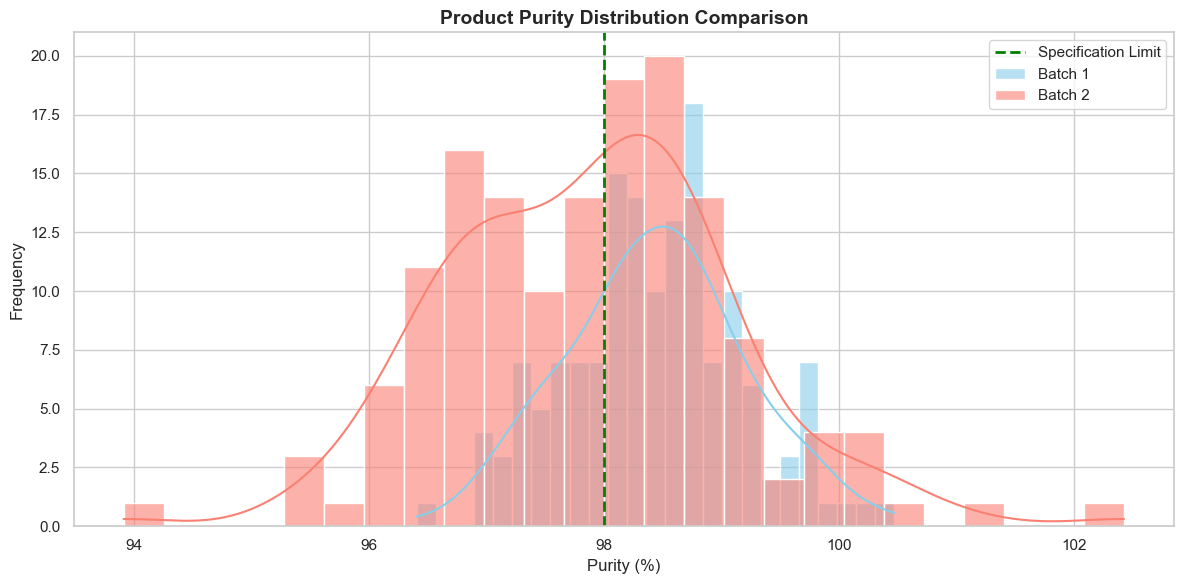

✓ 圖表已儲存


In [3]:
# 模擬產品純度數據（百分比）
purity_batch1 = np.random.normal(98.5, 0.8, 150)
purity_batch2 = np.random.normal(97.8, 1.2, 150)

plt.figure(figsize=(12, 6))

# 繪製雙直方圖比較
sns.histplot(purity_batch1, bins=25, kde=True, color='skyblue', label='Batch 1', alpha=0.6)
sns.histplot(purity_batch2, bins=25, kde=True, color='salmon', label='Batch 2', alpha=0.6)

plt.axvline(x=98.0, color='green', linestyle='--', linewidth=2, label='Specification Limit')
plt.title('Product Purity Distribution Comparison', fontsize=14, fontweight='bold')
plt.xlabel('Purity (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.tight_layout()
plt.savefig(FIG_DIR / 'histogram_purity.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ 圖表已儲存")

---
## 3. 箱型圖與蜂群圖 (Box Plot & Swarm Plot)

### 3.1 不同反應器批次產率比較

C:\Users\Yao-ChenChuang\AppData\Local\Temp\ipykernel_81168\2747448843.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Reactor', y='Yield (%)', palette='pastel', linewidth=2)


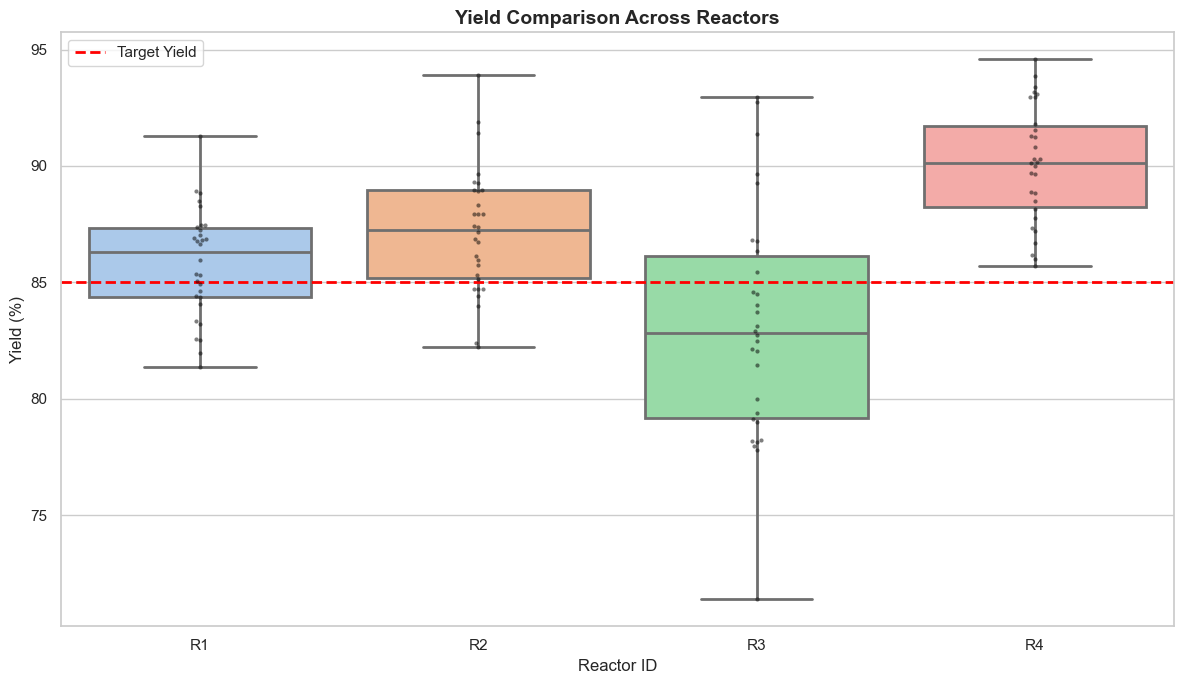

✓ 圖表已儲存


In [4]:
# 模擬四個反應器的產率數據
n_samples = 30

data = pd.DataFrame({
    'Reactor': ['R1']*n_samples + ['R2']*n_samples + ['R3']*n_samples + ['R4']*n_samples,
    'Yield (%)': np.concatenate([
        np.random.normal(85, 3, n_samples),
        np.random.normal(88, 4, n_samples),
        np.random.normal(82, 5, n_samples),
        np.random.normal(90, 2.5, n_samples)
    ])
})

plt.figure(figsize=(12, 7))
sns.boxplot(data=data, x='Reactor', y='Yield (%)', palette='pastel', linewidth=2)
sns.swarmplot(data=data, x='Reactor', y='Yield (%)', color='black', alpha=0.5, size=3)

plt.axhline(y=85, color='red', linestyle='--', linewidth=2, label='Target Yield')
plt.title('Yield Comparison Across Reactors', fontsize=14, fontweight='bold')
plt.xlabel('Reactor ID', fontsize=12)
plt.ylabel('Yield (%)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.savefig(FIG_DIR / 'boxplot_reactors.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ 圖表已儲存")

### 3.2 小提琴圖 - 產品品質分布

C:\Users\Yao-ChenChuang\AppData\Local\Temp\ipykernel_81168\4110187760.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='Temperature', y='Quality Score',


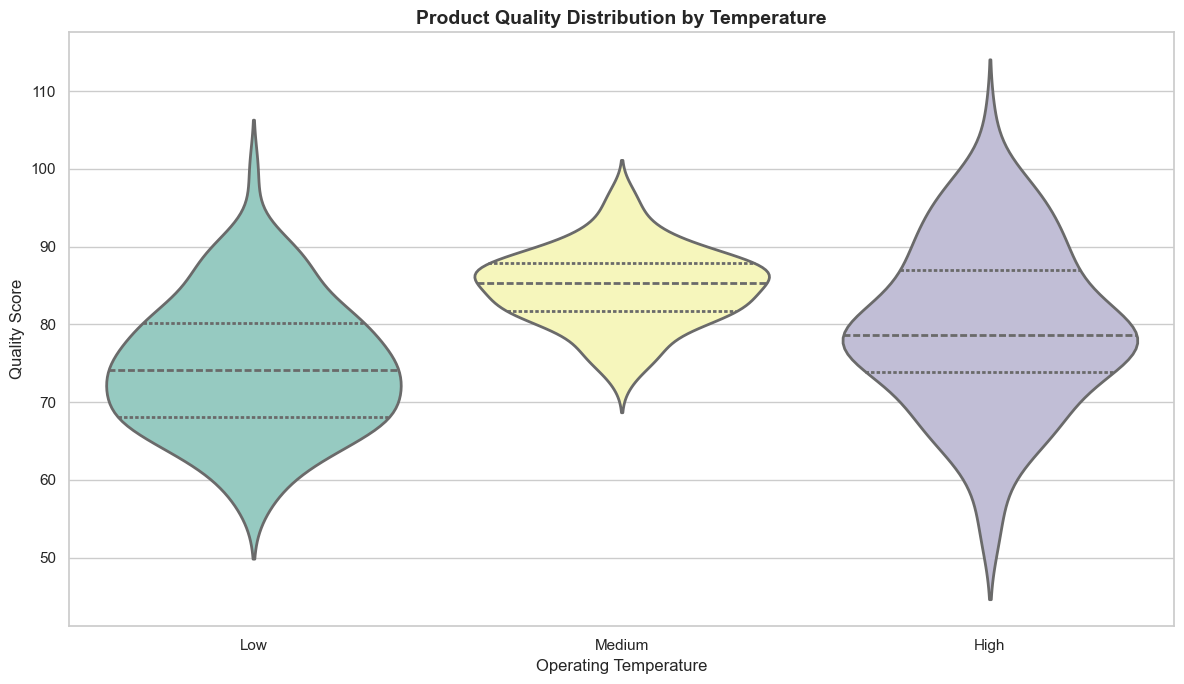

✓ 圖表已儲存


In [5]:
# 模擬不同溫度條件下的產品品質數據
n = 100

data = pd.DataFrame({
    'Temperature': ['Low']*n + ['Medium']*n + ['High']*n,
    'Quality Score': np.concatenate([
        np.random.normal(75, 8, n),
        np.random.normal(85, 5, n),
        np.random.normal(80, 10, n)
    ])
})

plt.figure(figsize=(12, 7))
sns.violinplot(data=data, x='Temperature', y='Quality Score', 
               palette='Set3', inner='quartile', linewidth=2)

plt.title('Product Quality Distribution by Temperature', fontsize=14, fontweight='bold')
plt.xlabel('Operating Temperature', fontsize=12)
plt.ylabel('Quality Score', fontsize=12)
plt.tight_layout()
plt.savefig(FIG_DIR / 'violinplot_quality.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ 圖表已儲存")

---
## 4. 散佈圖與回歸圖 (Scatter Plot & Regression Plot)

### 4.1 製程參數關係探索

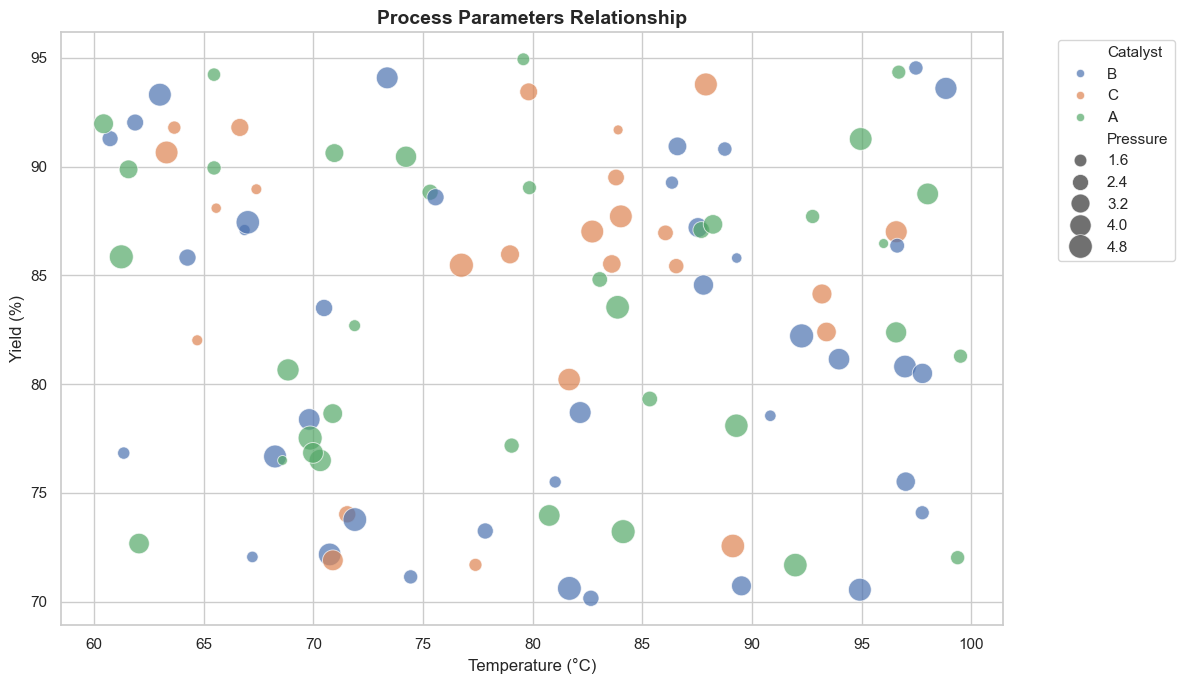

✓ 圖表已儲存


In [6]:
# 產生模擬數據
n = 100

data = pd.DataFrame({
    'Temperature': np.random.uniform(60, 100, n),
    'Pressure': np.random.uniform(1, 5, n),
    'Yield': np.random.uniform(70, 95, n),
    'Catalyst': np.random.choice(['A', 'B', 'C'], n)
})

# 繪製散佈圖
plt.figure(figsize=(12, 7))
sns.scatterplot(data=data, x='Temperature', y='Yield', 
                hue='Catalyst', size='Pressure',
                palette='deep', sizes=(50, 300), alpha=0.7)

plt.title('Process Parameters Relationship', fontsize=14, fontweight='bold')
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Yield (%)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(FIG_DIR / 'scatterplot_parameters.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ 圖表已儲存")

### 4.2 回歸圖 - 濃度與反應速率關係

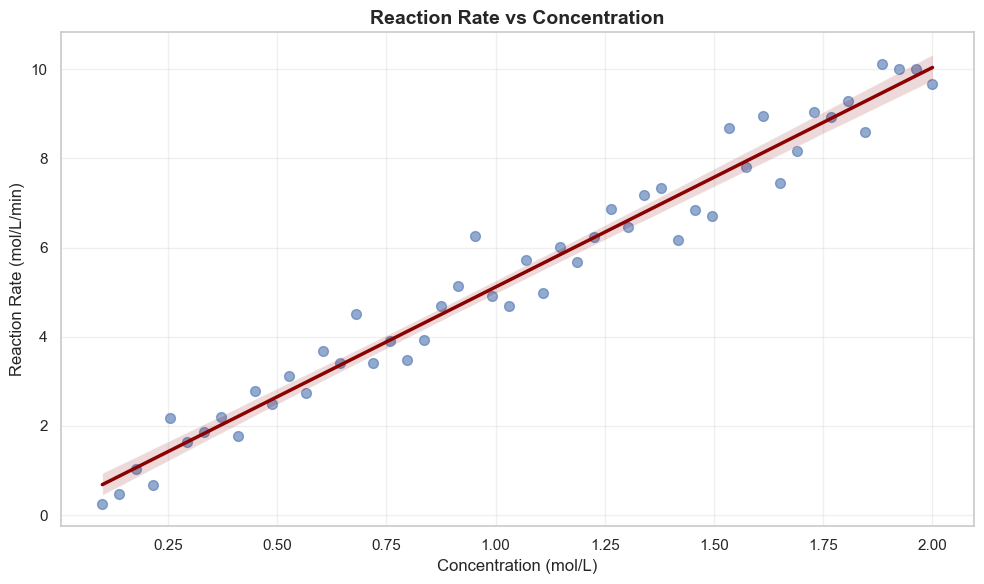

✓ 圖表已儲存


In [7]:
# 模擬濃度與反應速率數據
concentration = np.linspace(0.1, 2.0, 50)
rate = 5 * concentration + np.random.normal(0, 0.5, 50)

data = pd.DataFrame({
    'Concentration (mol/L)': concentration,
    'Reaction Rate (mol/L/min)': rate
})

plt.figure(figsize=(10, 6))
sns.regplot(data=data, x='Concentration (mol/L)', y='Reaction Rate (mol/L/min)',
            scatter_kws={'alpha':0.6, 's':50}, 
            line_kws={'color':'darkred', 'linewidth':2.5})

plt.title('Reaction Rate vs Concentration', fontsize=14, fontweight='bold')
plt.xlabel('Concentration (mol/L)', fontsize=12)
plt.ylabel('Reaction Rate (mol/L/min)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(FIG_DIR / 'regplot_concentration.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ 圖表已儲存")

---
## 5. 熱力圖 (Heatmap)

### 5.1 製程參數相關性分析

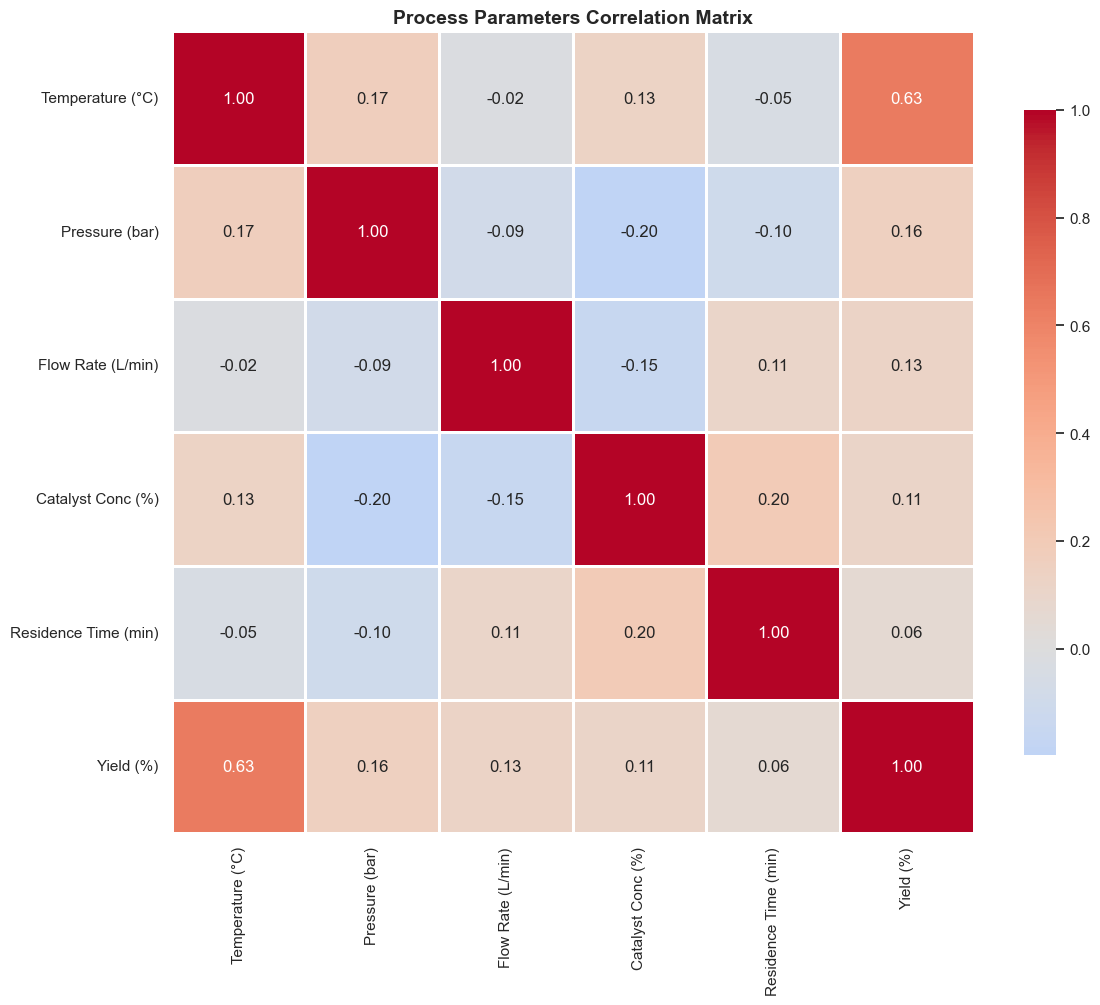

✓ 圖表已儲存


In [8]:
# 模擬製程數據
n = 100

data = pd.DataFrame({
    'Temperature (°C)': np.random.uniform(60, 100, n),
    'Pressure (bar)': np.random.uniform(1, 5, n),
    'Flow Rate (L/min)': np.random.uniform(10, 50, n),
    'Catalyst Conc (%)': np.random.uniform(0.5, 2, n),
    'Residence Time (min)': np.random.uniform(5, 30, n),
    'Yield (%)': np.random.uniform(70, 95, n)
})

# 加入一些相關性
data['Yield (%)'] = (0.3 * data['Temperature (°C)'] + 
                      0.2 * data['Pressure (bar)'] + 
                      0.15 * data['Catalyst Conc (%)'] + 
                      np.random.normal(0, 5, n))

# 計算相關性矩陣
corr_matrix = data.corr()

# 繪製相關性熱力圖
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, 
            cbar_kws={'shrink': 0.8})

plt.title('Process Parameters Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(FIG_DIR / 'heatmap_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ 圖表已儲存")

---
## 6. 配對圖 (Pair Plot)

### 6.1 多參數關係探索

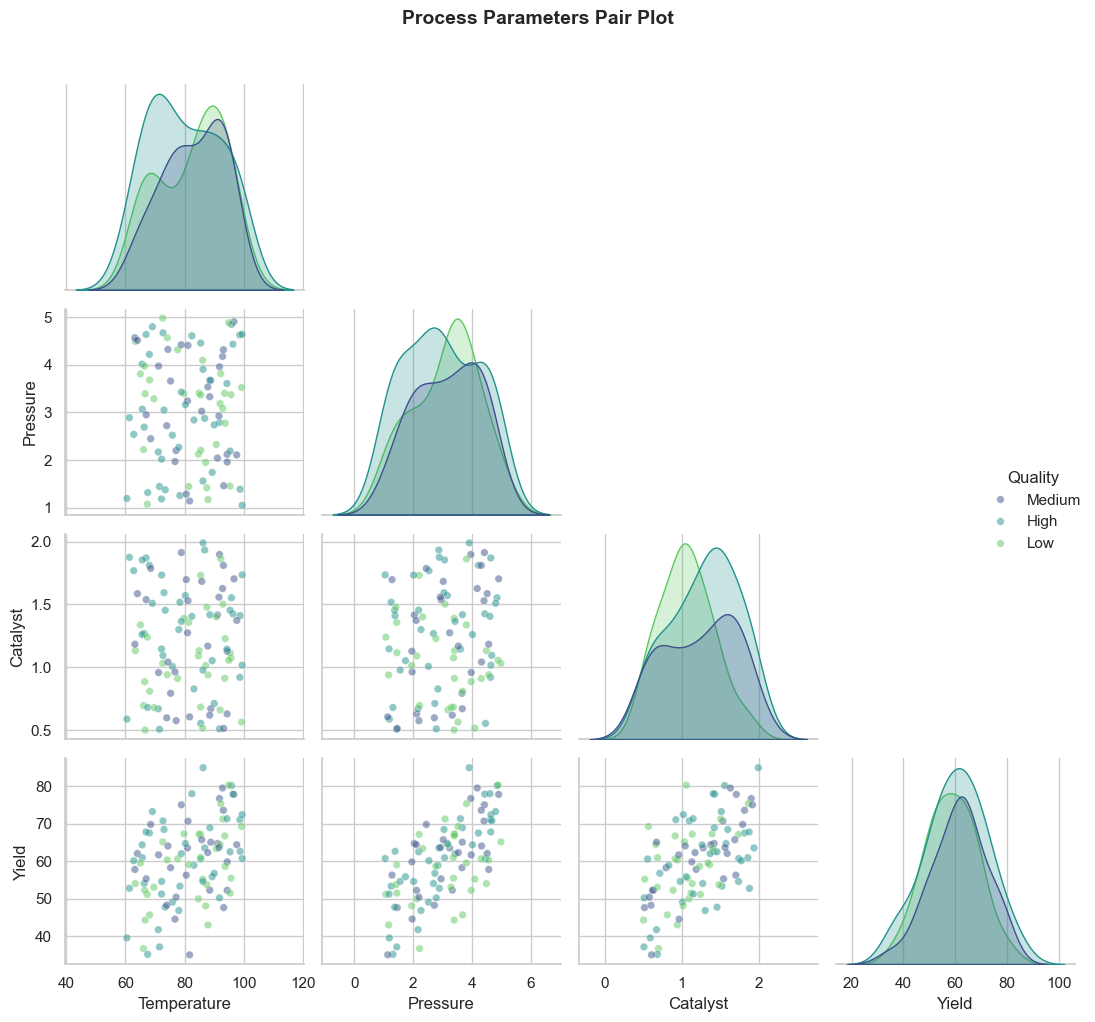

✓ 圖表已儲存


In [9]:
# 模擬反應條件數據
n = 100

data = pd.DataFrame({
    'Temperature': np.random.uniform(60, 100, n),
    'Pressure': np.random.uniform(1, 5, n),
    'Catalyst': np.random.uniform(0.5, 2, n),
    'Yield': np.random.uniform(70, 95, n),
    'Quality': np.random.choice(['Low', 'Medium', 'High'], n)
})

# 加入變數間的關聯
data['Yield'] = (0.4 * data['Temperature'] + 
                 5 * data['Pressure'] + 
                 10 * data['Catalyst'] + 
                 np.random.normal(0, 5, n))

# 繪製配對圖
g = sns.pairplot(data, hue='Quality', palette='viridis',
                 diag_kind='kde', plot_kws={'alpha':0.5, 's':30},
                 corner=True)

g.fig.suptitle('Process Parameters Pair Plot', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig(FIG_DIR / 'pairplot_parameters.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ 圖表已儲存")

---
## 7. 綜合應用案例：製程優化數據分析

整合多種 Seaborn 圖表，進行完整的製程數據分析。

C:\Users\Yao-ChenChuang\AppData\Local\Temp\ipykernel_81168\610361771.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Reactor', y='Yield (%)',
C:\Users\Yao-ChenChuang\AppData\Local\Temp\ipykernel_81168\610361771.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='Quality', y='Yield (%)',


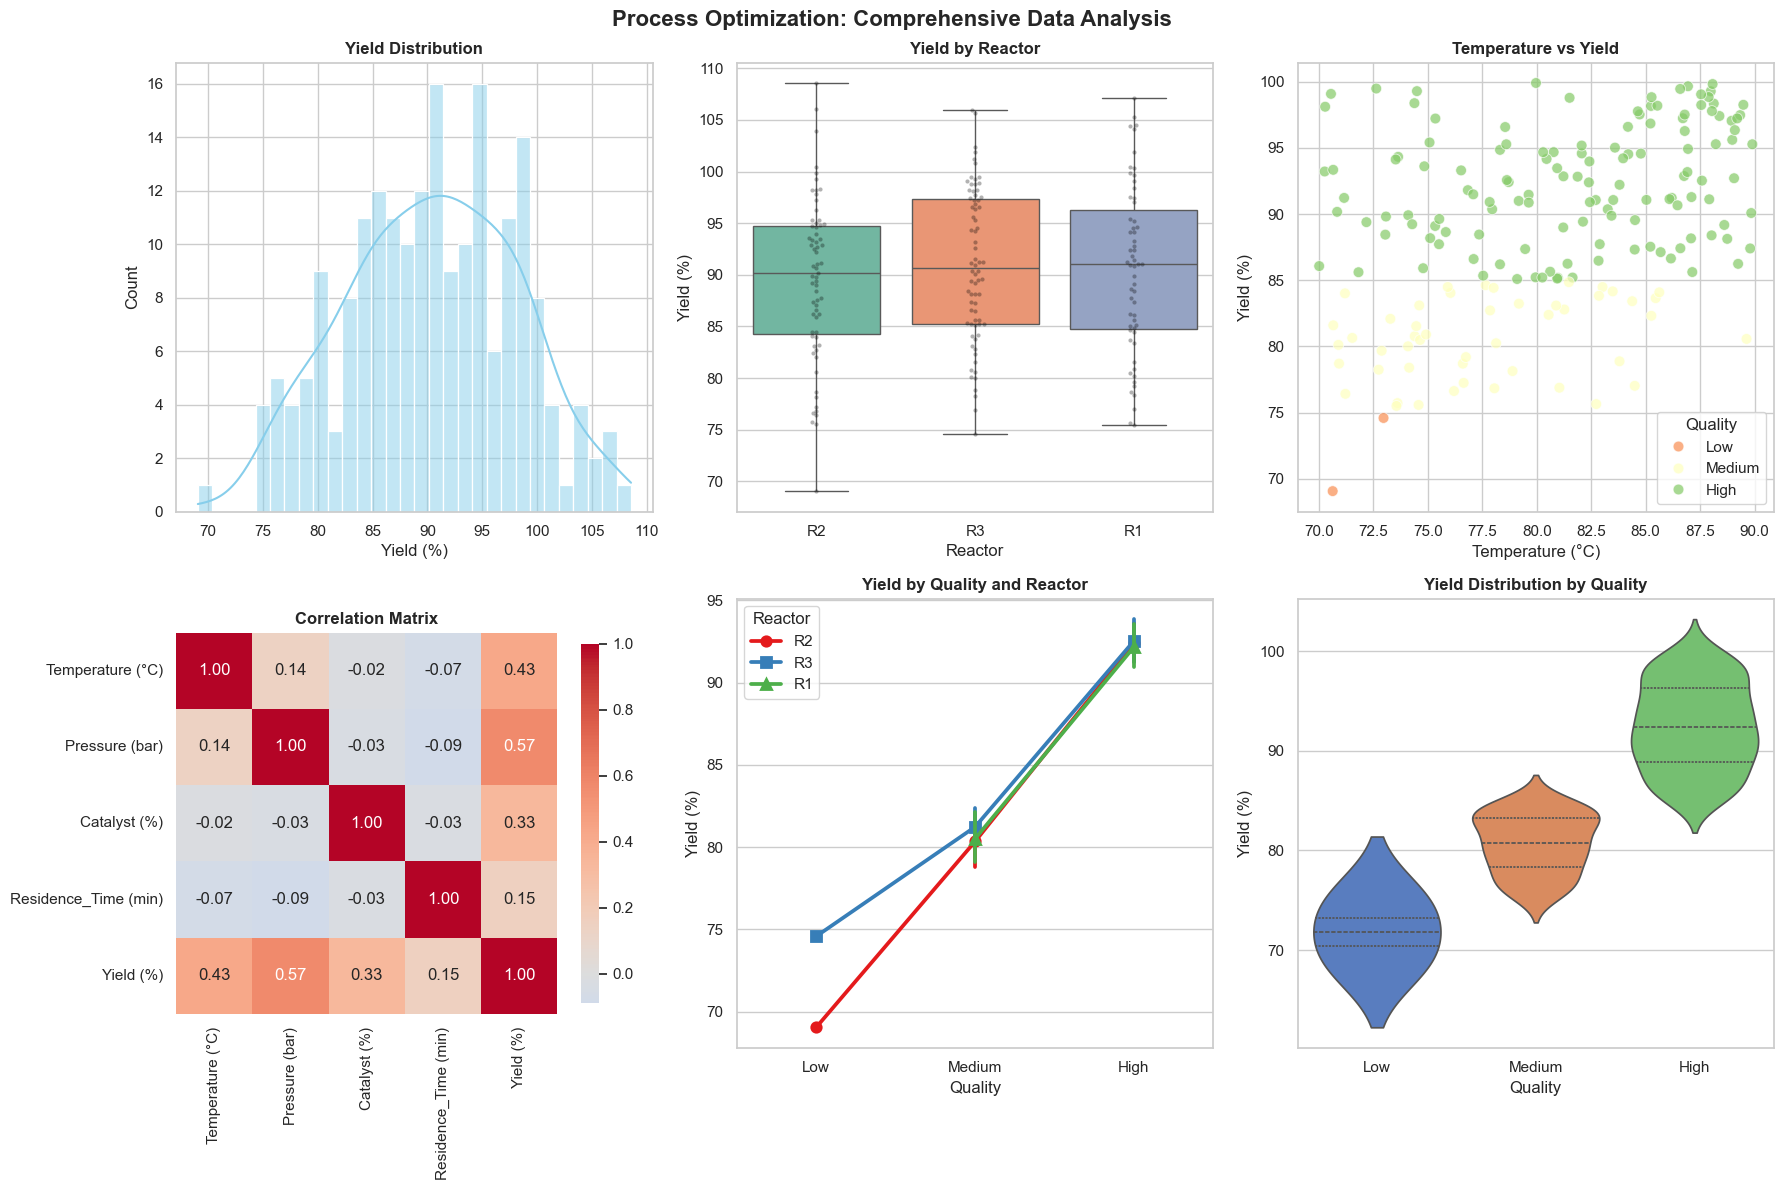

✓ 綜合分析圖表已儲存


In [10]:
# 模擬完整的製程數據
n = 200

data = pd.DataFrame({
    'Batch_ID': [f'B{i:03d}' for i in range(1, n+1)],
    'Temperature (°C)': np.random.uniform(70, 90, n),
    'Pressure (bar)': np.random.uniform(2, 4, n),
    'Catalyst (%)': np.random.uniform(0.8, 1.5, n),
    'Residence_Time (min)': np.random.uniform(20, 40, n),
    'Yield (%)': 0,
    'Quality': '',
    'Reactor': np.random.choice(['R1', 'R2', 'R3'], n)
})

# 建立變數關係
data['Yield (%)'] = (0.5 * data['Temperature (°C)'] + 
                     8 * data['Pressure (bar)'] + 
                     15 * data['Catalyst (%)'] + 
                     0.3 * data['Residence_Time (min)'] + 
                     np.random.normal(0, 5, n))

# 品質分類
data['Quality'] = pd.cut(data['Yield (%)'], 
                         bins=[0, 75, 85, 100], 
                         labels=['Low', 'Medium', 'High'])

# 建立綜合分析圖表
fig = plt.figure(figsize=(18, 12))

# 1. 產率分佈直方圖
ax1 = plt.subplot(2, 3, 1)
sns.histplot(data=data, x='Yield (%)', bins=30, kde=True, 
             color='skyblue', ax=ax1)
ax1.set_title('Yield Distribution', fontsize=12, fontweight='bold')

# 2. 不同反應器的產率比較
ax2 = plt.subplot(2, 3, 2)
sns.boxplot(data=data, x='Reactor', y='Yield (%)', 
            palette='Set2', ax=ax2)
sns.swarmplot(data=data, x='Reactor', y='Yield (%)', 
              color='black', alpha=0.3, size=3, ax=ax2)
ax2.set_title('Yield by Reactor', fontsize=12, fontweight='bold')

# 3. 溫度與產率關係
ax3 = plt.subplot(2, 3, 3)
sns.scatterplot(data=data, x='Temperature (°C)', y='Yield (%)', 
                hue='Quality', palette='RdYlGn', s=60, alpha=0.7, ax=ax3)
ax3.set_title('Temperature vs Yield', fontsize=12, fontweight='bold')

# 4. 相關性矩陣
ax4 = plt.subplot(2, 3, 4)
corr_cols = ['Temperature (°C)', 'Pressure (bar)', 
             'Catalyst (%)', 'Residence_Time (min)', 'Yield (%)']
corr_matrix = data[corr_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, ax=ax4, cbar_kws={'shrink': 0.8})
ax4.set_title('Correlation Matrix', fontsize=12, fontweight='bold')

# 5. 多參數點圖
ax5 = plt.subplot(2, 3, 5)
quality_order = ['Low', 'Medium', 'High']
sns.pointplot(data=data, x='Quality', y='Yield (%)', hue='Reactor',
              palette='Set1', markers=['o', 's', '^'], ax=ax5,
              order=quality_order)
ax5.set_title('Yield by Quality and Reactor', fontsize=12, fontweight='bold')

# 6. 小提琴圖
ax6 = plt.subplot(2, 3, 6)
sns.violinplot(data=data, x='Quality', y='Yield (%)', 
               palette='muted', inner='quartile', ax=ax6,
               order=quality_order)
ax6.set_title('Yield Distribution by Quality', fontsize=12, fontweight='bold')

plt.suptitle('Process Optimization: Comprehensive Data Analysis', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(FIG_DIR / 'comprehensive_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ 綜合分析圖表已儲存")

---
## 8. 總結

本 Notebook 展示了 Seaborn 在化工領域數據視覺化的應用：

### 主要學習內容
1. **分佈圖**：直方圖、KDE 圖用於分析產品品質分佈
2. **類別圖**：箱型圖、小提琴圖用於比較不同條件或設備
3. **關係圖**：散佈圖、回歸圖用於探索變數關係
4. **熱力圖**：相關性矩陣視覺化，了解參數間的關聯
5. **配對圖**：多變數關係的全面探索
6. **綜合應用**：整合多種圖表進行完整的製程分析

### Seaborn 的優勢
- 簡潔的語法，快速建立專業圖表
- 美觀的預設樣式
- 自動統計計算與視覺化
- 與 Pandas DataFrame 無縫整合

### 化工應用建議
- 探索性數據分析：使用配對圖、分佈圖
- 製程比較：使用箱型圖、小提琴圖
- 相關性分析：使用熱力圖
- 參數優化：使用散佈圖、回歸圖